In [ ]:
# from IPython.display import Image
from IPython.display import clear_output
from IPython.display import FileLink, FileLinks

## Introduction to

![title](img/python-logo-master-flat.png)

### for scientific computing

#### - Lecture 9

## Review last lecture

- More control!

  - variables scope
  - `None`
  - keyword arguments
  - documentation, comments...
  
- Pandas


#### Control loops

- `break` a loop => stop it

<center>
<img src="img/break.png" alt="break" width="30%"/>
</center>


#### Control loops

- `continue` => go on to the next iteration

<center>
<img src="img/continue.png" alt="break" width="30%"/>
</center>

#### Control statements

- `pass`  => do nothing

```py
for line in file:
    if len(line) > 40:
        # TODO find out what to do here
        pass
    do_something(line)
```

In [51]:
my_list = ['Initial element 1', 'Initial element 2']

def function_returning_values():
    return ['Function element 1', 'Function element 2']

my_list = function_returning_values()
print(my_list)

['Function element 1', 'Function element 2']


In [52]:
my_list = ['Initial element 1', 'Initial element 2']

def function_returning_values():
    my_list = ['Function element 1', 'Function element 2']

function_returning_values()
print(my_list)

['Initial element 1', 'Initial element 2']


In [54]:
my_list = ['Initial element 1', 'Initial element 2']

def function_returning_values(li):
    li = ['Function element 1', 'Function element 2']

my_list = function_returning_values(my_list)
print(my_list)

None


In [56]:
# `None` means "nothing". Use it to check your variables

variable = 0
if variable:
    print('if variable')
if not variable:
    print('if not variable')
if variable is not None:
    print('if variable is not None')
if variable is None:
    print('if variable is None')

if not variable
if variable is not None


#### None

`None` means "nothing". Is neither true nor false.

```py
if value:
   print('value is not None')
```

#### Keyword arguments

```py
open(filename, encoding="utf-8")
```

```py
open(file, mode='r', buffering=-1, encoding=None, errors=None, newline=None, closefd=True, opener=None)
```


#### Keyword arguments

- programmer: set default values
- user: ignore parameters
- better overview

#### Using code

- Python standard modules
- Your colleague's code


- `import pandas`
- `import matplotlib.pyplot as plt`
- `from matplotlib.pyplot import show`


#### Documentation and getting help

- `help(sys)`

- write comments       `# why do I do this?`
- write documentation  `"""what is this? how do you use it?"""`

#### Writing readable code

```py
def f(a, b):
    for c in open(a):
        if c.startswith(b):
            print(c)
```

==>

```py
def print_lines(filename, start):
    """Print all lines in the file that starts with the given string."""
    for line in open(filename):
        if line.startswith(start):
            print(line)
```

**<center>Care about the names of your variables and functions</center>**

### Pandas

- Read tables
```py
dataframe = pandas.read_table('mydata.txt', sep='|', index_col=0)
dataframe = pandas.read_csv('mydata.csv')
```

- Select rows and colums
```py
dataframe.columname
dataframe.loc[rowname]
dataframe.loc[dataframe.age == 20 ]
```

- Plot it
```py
dataframe.plot(kind='line', x='column1', y='column2')
```

## TODAY

- Plotting (and a bit of numerical computation)
- Regular expressions

## Plotting with python

* Hundreds of different ways of plotting the same thing
    - Scatter plots, line plots, bar plots, box plots...
* Different libraries too!
    - pandas, matplotlib, seaborn...
    
<img src="img/many_plots.png"/>

* Let's look at the basics with matplotlib, then you can adapt to your own problem

## Basic plot

* Take a list of numbers, plot them on the `y` axis
* matplotlib will automatically use the index of each number as `x`

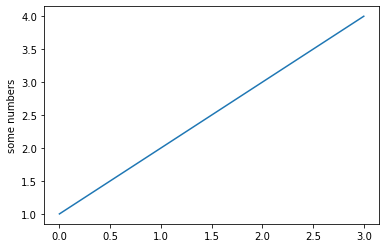

In [58]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

## Basic plot

* You might want to specify both `x` and `y`, then you pass two lists:

Text(0, 0.5, 'numbers from second list')

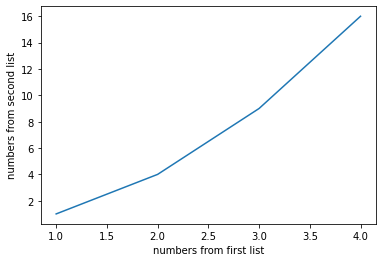

In [59]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
plt.xlabel('numbers from first list')
plt.ylabel('numbers from second list')

## Line style

* Follows matlab notation in a third optional variable
    - [List of markers and colors](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot)
* Limit axes start/end wit `.axis(xstart, xend, ystart, yend)`

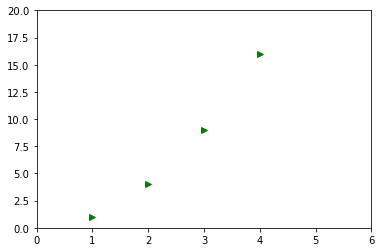

In [61]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16], 'ro') # r -> red o -> circular marker
plt.axis([0, 6, 0, 20])
plt.show()

## Scientific plotting

* Need to generate finer numeric intervals (not just lists of integers)
    - Uses a new library: [numpy](https://numpy.org/doc/stable/user/absolute_beginners.html)
* Let's say I want to plot a measurement taken every 0.2 seconds
    - x axis: time (0s, 0.2s, 0.4s...)
    - y axis: measurement at that time

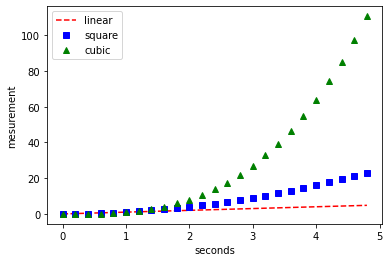

In [106]:
import numpy as np

# evenly sampled time at 200ms intervals
timesteps = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(timesteps, timesteps, 'r--')
plt.plot(timesteps, timesteps**2, 'bs')
plt.plot(timesteps, timesteps**3, 'g^')
plt.legend(["linear", "square", "cubic"])
plt.xlabel("seconds")
plt.ylabel("mesurement")
plt.show()


## Plotting from dictionaries or dataframes

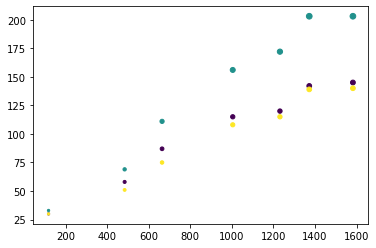

In [105]:
import pandas as pd
import math

# trees could also be a dictionary! trees = {"age": [...], "Tree": [...], "circumference": [...]}
trees = pd.read_table('../downloads/Orange.tsv')
trees["radius"] = trees["circumference"] / 2.0 / math.pi

plt.scatter("age", "circumference", c="Tree", s="radius", data=trees)


## Plotting with categorical variables

* You can plot strings (categories) and numbers together

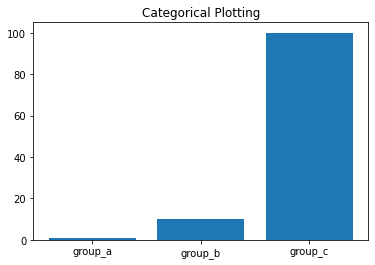

In [108]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]

plt.bar(names, values)
#plt.scatter(names, values)
#plt.plot(names, values)
plt.title('Categorical Plotting')
plt.show()

## Multiple plots in one (subplots)

* Create a figure
* Create subplots by using a jkl numeric code:
    * j: number of rows
    * k: number of columns
    * l: number of current plot

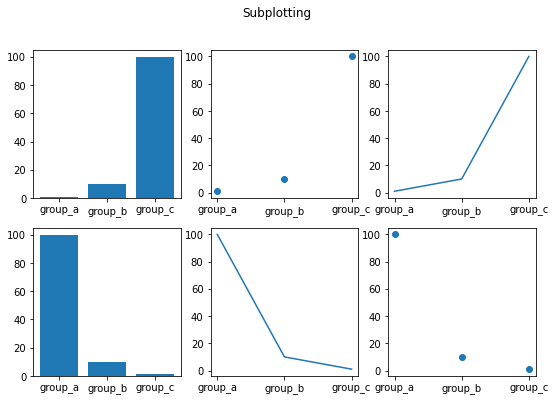

In [113]:
names = ['group_a', 'group_b', 'group_c']
values = [1, 10, 100]
values2 = [100, 10, 1]

plt.figure(figsize=(9, 6))
# 2 rows, 3 columns
plt.subplot(231)
plt.bar(names, values)
plt.subplot(232)
plt.scatter(names, values)
plt.subplot(233)
plt.plot(names, values)
plt.subplot(234)
plt.bar(names, values2)
plt.subplot(235)
plt.plot(names, values2)
plt.subplot(236)
plt.scatter(names, values2)
plt.suptitle('Subplotting')
plt.show()

## Adding text to plots

* Use .text() and specify `x, y` position for bottom-left corner of text
* Can also add a title to the plot!

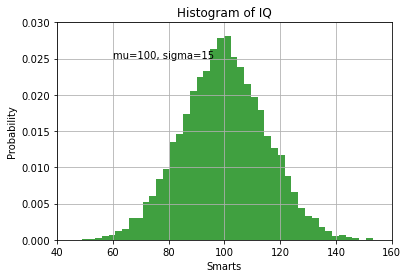

In [114]:
mu, sigma = 100, 15
# make a gaussian distribution with mean mu, std sigma
samples = mu + sigma * np.random.randn(10000)

# the histogram of the data
n, bins, patches = plt.hist(samples, bins=50, density=True, facecolor='g', alpha=0.75)

plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, 'mu=100, sigma=15')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

## Logarithmic axes

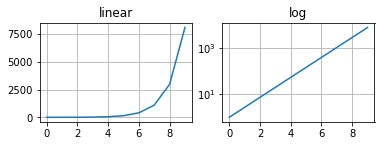

In [50]:
# make up some exponential data
x = np.arange(10)
y = np.exp(x)

# plot with various axes scales
plt.figure()

# linear
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)

# log
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)
